In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns 
import sklearn
from uszipcode import SearchEngine


In [2]:
credit = pd.read_csv(r"C:\Users\Dell\Documents\Python Credit Risk\SBAnational.csv", low_memory=False)

In [3]:
credit.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [14]:
# Summary 
credit.describe()

,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,897165.000000,897165.000000,897165.000000,897165.000000,897031.000000,897165.000000,897165.000000,897165.000000,897165.000000
mean,53856.723561,398542.138365,110.848444,11.412579,1.280405,8.444324,10.807332,2757.534435,0.757275
std,31170.421970,263359.641749,78.900733,73.793857,0.451739,236.950513,237.382662,12767.039528,0.646540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27612.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,55416.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,83706.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [25]:
# type of data

credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897165 entries, 0 to 899163
Data columns (total 23 columns):
State                897165 non-null object
Zip                  897165 non-null int64
NAICS                897165 non-null int64
ApprovalDate         897165 non-null object
ApprovalFY           897165 non-null object
Term                 897165 non-null int64
NoEmp                897165 non-null int64
NewExist             897165 non-null int64
CreateJob            897165 non-null int64
RetainedJob          897165 non-null int64
FranchiseCode        897165 non-null int64
UrbanRural           897165 non-null int64
RevLineCr            892645 non-null object
LowDoc               894587 non-null object
ChgOffDate           162436 non-null object
DisbursementDate     894990 non-null object
DisbursementGross    897165 non-null object
BalanceGross         897165 non-null object
MIS_Status           897165 non-null object
ChgOffPrinGr         897165 non-null object
GrAppv            

In [17]:
print(credit.columns)

Index(['State', 'Zip', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv', 'RealEstate'],
      dtype='object')


In [ ]:
# Preprocessing and feature engenieering

# we use the information about the features in the pdf we received
# they added some other features to the dataset like recession percentage of loan by SBA, loans backed by realestate which we could use too
# also we will have to deal with all the missing values and impute them somehow or delete them
# we will have to dummify the features like y/n to 0/1 and also the target to 0/1 meaning default/paied
# we will have to deal with all the dates and use them to build the other column and discard them after
# also city/ state/ zip describe same variable kinda same bank / bank state whci we will dleete because is says nothing about the customer
# NAICS is type of business so we might need it

# We have to fix the nas
# We have to decide which features we keep as predctors and which we dont and if we need to build new features


In [4]:
# check na
credit.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [4]:
# see the distribution of some of the features
Counter(credit['MIS_Status'])  # unbalanced + nas

Counter({'P I F': 739609, 'CHGOFF': 157558, nan: 1997})

In [50]:
Counter(credit['NewExist']) # 136 nas and values 2=new, 1=exist, 0 we dont know what it means so we add to na
# This feature might be important so we will fix the nas and keep it

Counter({1: 252559, 0: 644606})

In [11]:
Counter(credit['State'])   # looks ok, 14 na we can fill using the ZIP


Counter({'IN': 14132,
         'OK': 9950,
         'FL': 41212,
         'CT': 12229,
         'NJ': 24035,
         'NC': 14294,
         'IL': 29669,
         'RI': 9028,
         'TX': 70458,
         'VA': 13264,
         'TN': 9403,
         'AR': 6341,
         'MN': 24373,
         'MO': 20678,
         'MA': 25272,
         'CA': 130619,
         'SC': 5597,
         'LA': 9576,
         'IA': 11996,
         'OH': 32622,
         'KY': 7723,
         'MS': 7686,
         'NY': 57693,
         'MD': 13269,
         'PA': 35170,
         'OR': 11051,
         'ME': 5944,
         'KS': 11464,
         'MI': 20545,
         'AK': 2405,
         'WA': 23263,
         'CO': 20605,
         'MT': 8749,
         'WY': 2839,
         'UT': 18776,
         'NH': 12109,
         'WV': 3287,
         'ID': 9498,
         'AZ': 17631,
         'NV': 8024,
         'WI': 21040,
         'NM': 6033,
         'GA': 22277,
         'ND': 5245,
         'VT': 5454,
         'AL': 8362,
      

In [32]:
credit['Bank'].nunique() # a lot of different values for this variable we will delete it also might not be relevant

5802

In [12]:
credit['NAICS'].nunique() # a lot of them but it says something abot the data so we keep it + NO NA

1312

In [13]:
credit['BankState'].nunique() # looks ok but we will drop it because doesen't say much about the customer

56

In [3]:
#Name and id is unique and useless and we can drop entire column.
# we also delete the city (because we have state and zip), Bank Name (many values), 
credit = credit.drop(columns=['LoanNr_ChkDgt', 'City','Name','Bank','BankState'])

In [4]:
# Fixing state nas

missing_rows = credit[credit['State'].isnull()].index
search = SearchEngine()

# impute State using zearch.by_zipcode function
for i in missing_rows:
    zipcode = search.by_zipcode(credit.iloc[i,1])
    credit.iloc[i,0] = zipcode.state

In [5]:
#Check how our NA's was imputed. We still have 2 NAs. One zipcode = 0 
#and other is not in list the of search.by_zipcode function. We will remove them 
credit = credit.dropna(how='any', subset=['State'])

In [8]:
credit.isnull().sum()

State                     0
Zip                       0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [6]:
# we have missing values in mis_status (our target variable). We will remove the rows in question because we cannot 
# impute them in a way that we are 100 % that it will be prepresentative , also they are nit that many
credit = credit.dropna(how='any', subset=['MIS_Status'])

In [7]:
# Nas is new exist and change to 0/1 label
# after change type to object we will impute nas to most frequent value
credit["NewExist"] = credit.NewExist.astype(object)

In [8]:
credit['NewExist'].fillna(1, inplace=True)  # fill nas with 1 (most frequent)

In [9]:
credit.loc[credit['NewExist'] == 0, 'NewExist'] = 1 # change 0 to 1 (most frequent)
# create function to change from 2 to 0(new) and 1 to 0 meaning 1 existed and 0 new

def onezero(i):
    if i == 2:
        return 0

# apply to the new exist and change label 0=new, 1=exist
credit.NewExist = credit.NewExist.apply(onezero)

In [10]:
# add column loans backed by “RealEstate,” where  “RealEstate” = 1 if “Term” > 240 months 
# and “RealEstate” = 0 if “Term” <240 months
credit['RealEstate'] = np.where(credit['Term'] > 240, 1, 0)
Counter(credit['RealEstate']) # majority not backed by realestate

Counter({0: 831027, 1: 66138})

In [11]:
# fix na and relabel LowDoc Loan Program: Y = Yes, N = No to 0= no and 1 = yes # we have also other values (S,A,0,R,C,1) that
# we will also change to 1 or 0
Counter(credit['LowDoc']) 


Counter({'Y': 110171,
         'N': 780995,
         'C': 758,
         '1': 1,
         nan: 2578,
         'S': 603,
         'R': 74,
         'A': 495,
         '0': 1490})

In [13]:
# build a column with the pecentage of sba covered of the loan(ratio of the
#amount of the loan SBA guarantees and the gross amount approved by the bank (SBA_Appv/GrAppv).)
credit['SBA_Appv']= credit['SBA_Appv'].str[1:]  # remove the dollar sign to be able to convert to float
credit['GrAppv']= credit['GrAppv'].str[1:]
credit['SBA_Appv']=credit['SBA_Appv'].str.slice(0, -2)  # remove the two last spaces
credit['GrAppv']=credit['GrAppv'].str.slice(0, -2)
credit['SBA_Appv']=credit['SBA_Appv'].replace(',', '', regex=True)  # remove the , from the number 
credit['GrAppv']=credit['GrAppv'].replace(',', '', regex=True)
credit['SBA_Appv'] = credit['SBA_Appv'].astype(float)  # change to float 
credit['GrAppv'] = credit['GrAppv'].astype(float)
credit['Portion'] = round((credit['SBA_Appv'] / credit['GrAppv']) *100)  #Build the new column

ValueError: could not convert string to float: '48,000.00 '

In [24]:
# we will try to decide which fetures to keep and which to discard for building the models
credit.describe()
# We can delete the zip because we already use the location of client using state
# we can delete the term because we used it for bulding the real estate column 
# we can delete all the dates because they have a lot of na and we cannot use them in the prediction ( 'ChgOffDate', 'DisbursementDate')
credit = credit.drop(columns=['Zip', 'ChgOffDate','DisbursementDate','GrAppv','SBA_Appv','ApprovalDate','ApprovalFY','Term'])
# We aldo delete the gross app and sba app because we used it to build the portion %

In [31]:
print(credit.columns)

Index(['State', 'NAICS', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr',
       'RealEstate', 'Portion'],
      dtype='object')


c:\users\dell\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\dell\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


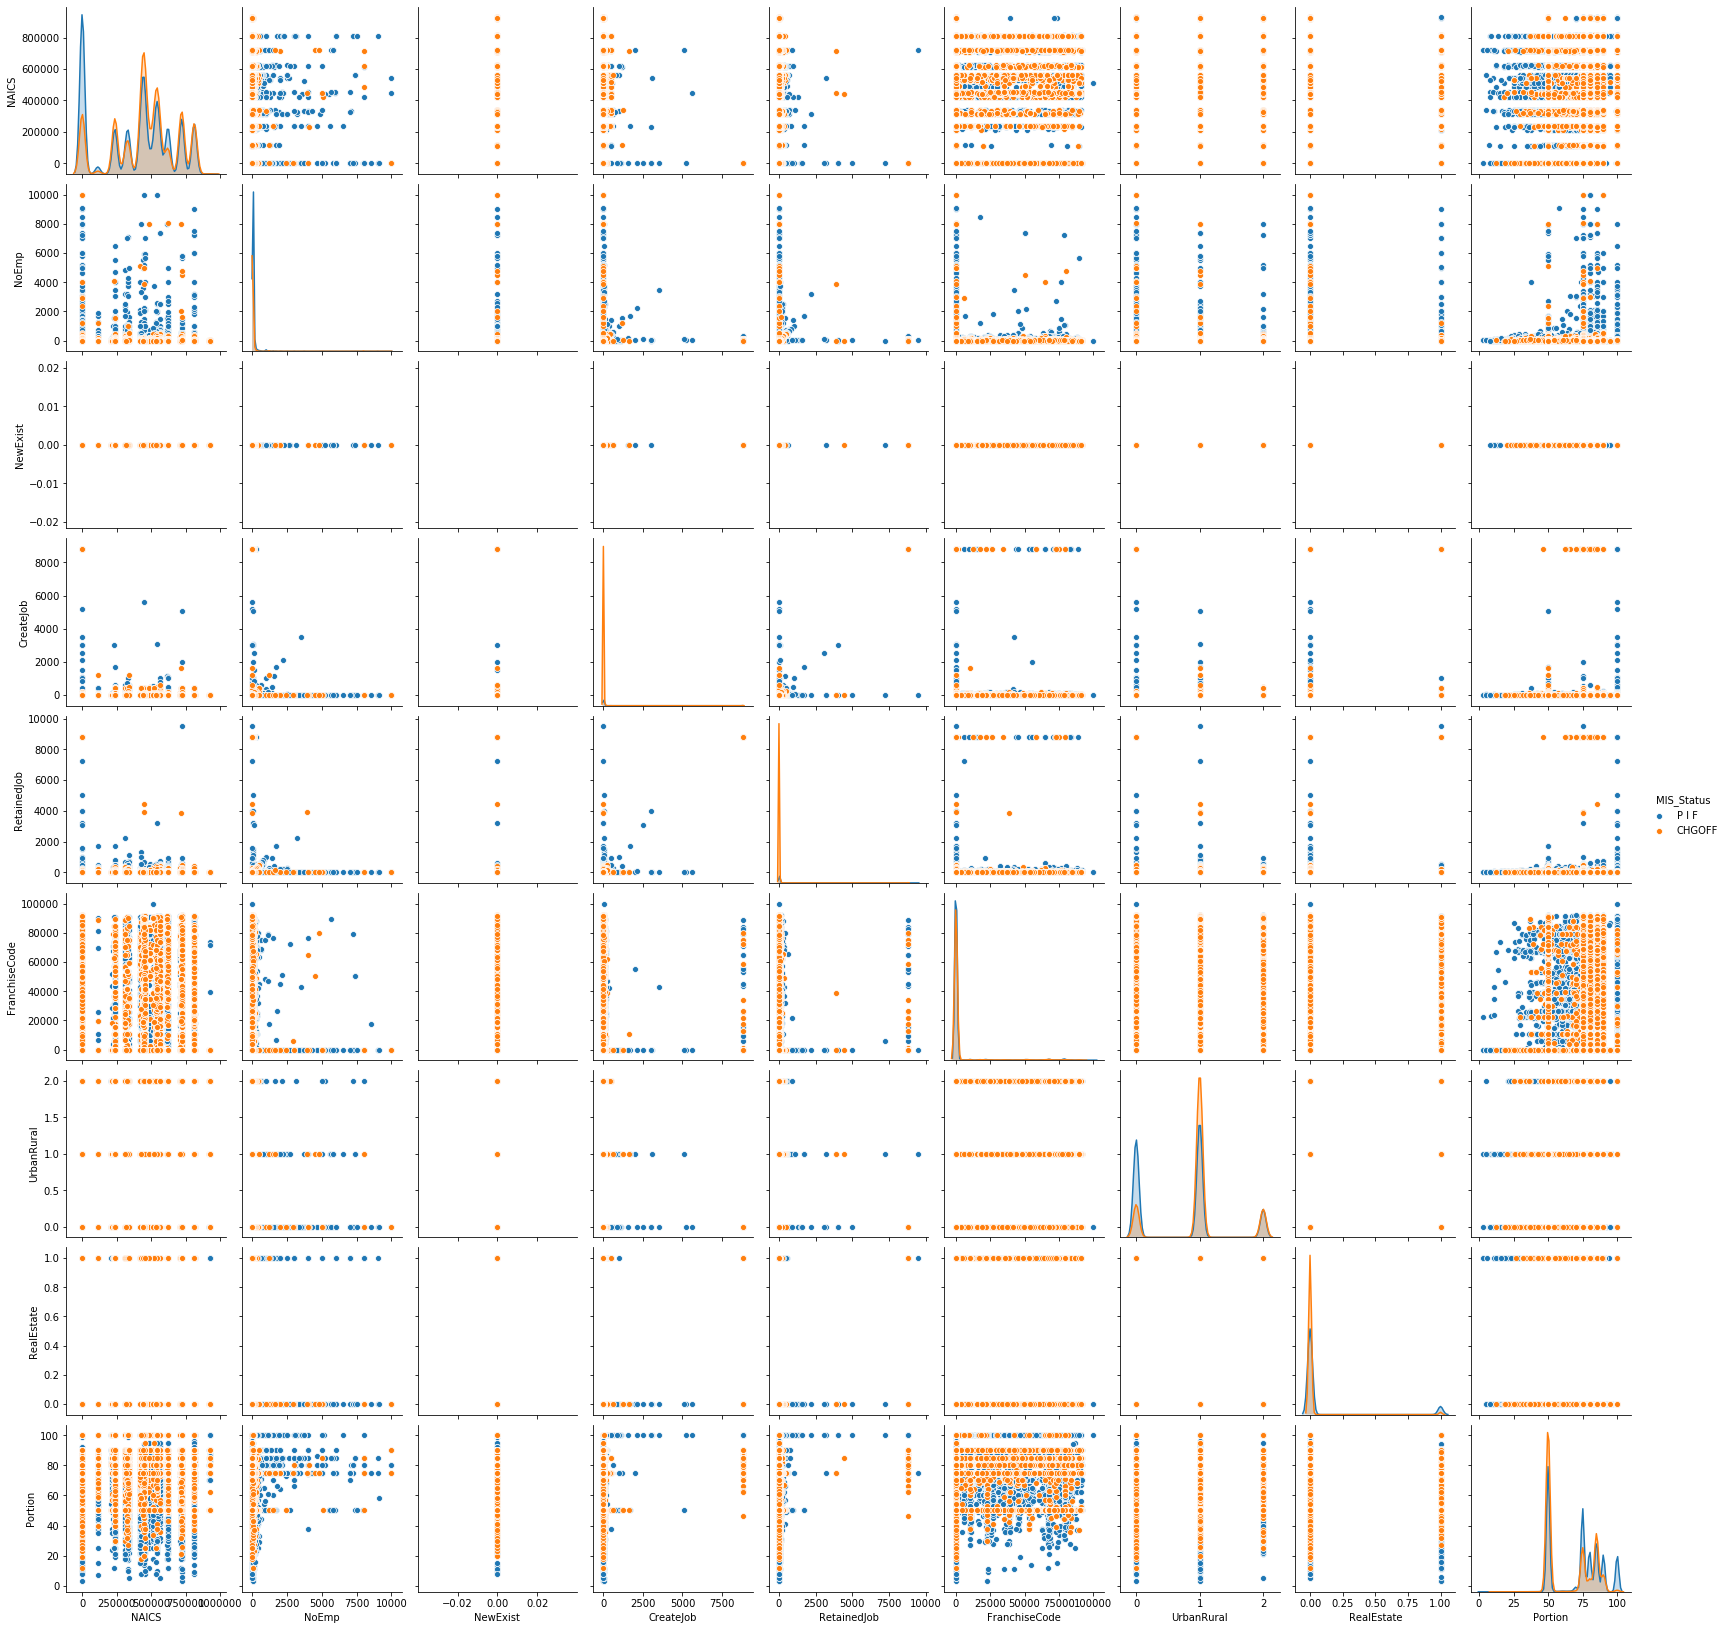

In [32]:
sns.pairplot(credit, kind="scatter", hue="MIS_Status")
plt.show()